### Practice Exercise (Polynomail Regression)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#loading the dataset:
df = pd.read_csv('ads_budget_profit.csv')
print(f'Missing values in dataset: \n{df.isnull().sum()}')

#feature and target variables
X = df[['Budget']].values
y = df[['Profit']].values

Missing values in dataset: 
Budget    0
Profit    0
dtype: int64


In [14]:
#Training the linear Regression model (dataset is small, so not gonna split train and test sets)
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
ln.fit(X,y)

LinearRegression()

In [21]:
#training the polynomail Regression model
from sklearn.preprocessing import PolynomialFeatures

degree= 4
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

ln_poly = LinearRegression()
ln_poly.fit(X_poly,y)

LinearRegression()

Trained two regression model to compare the linear and polynomial regression model results


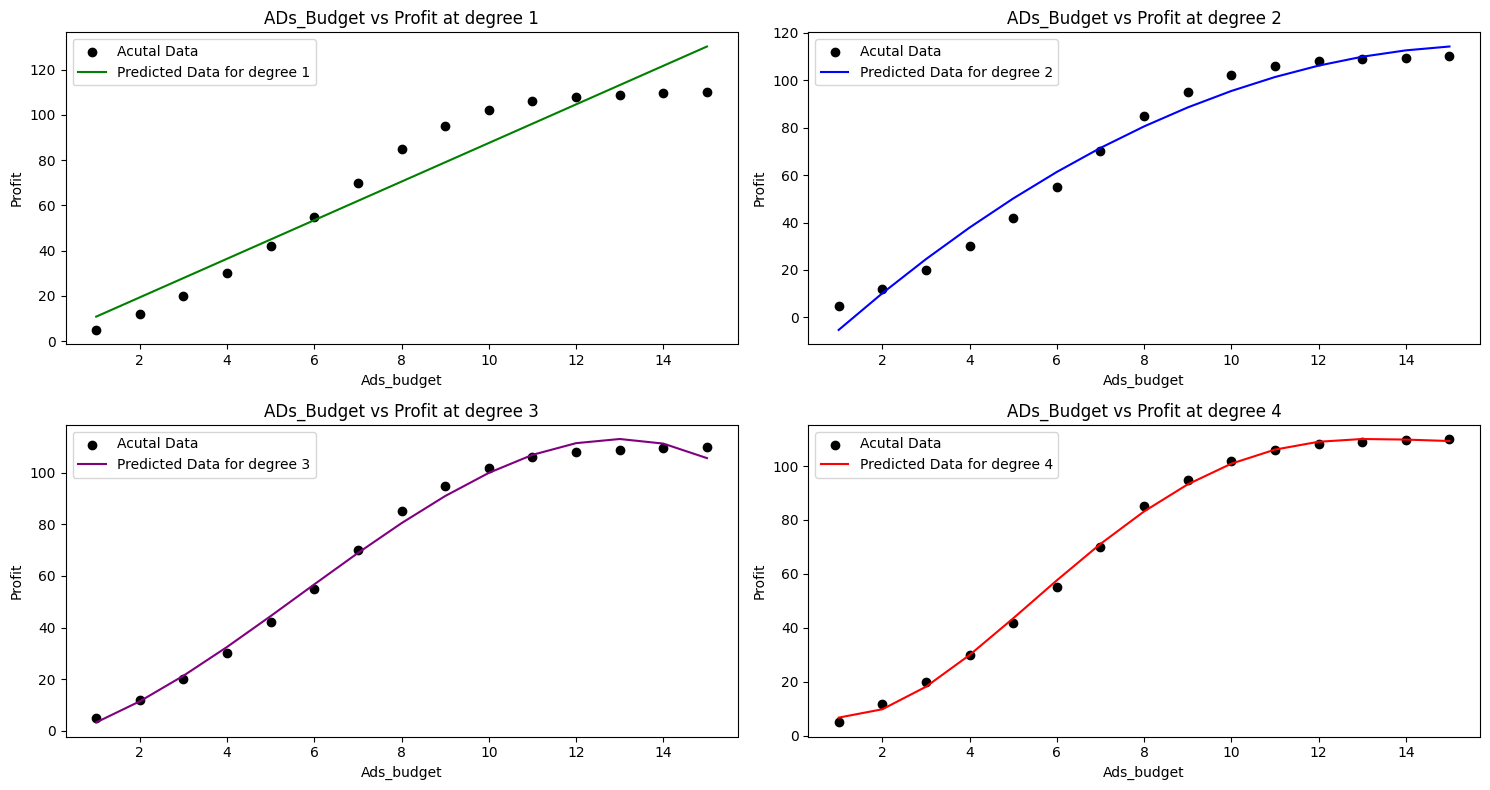

In [16]:
#visualization of comparsion of different degrees

degrees = [1,2,3,4]
color= ['Green','Blue','Purple','Red']
plt.figure(figsize=(15,8))

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)

    #fit the model
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    Ln_poly = LinearRegression()
    ln_poly.fit(X_poly,y)

    plt.scatter(X,y,color='Black',label='Acutal Data')
    plt.plot(X,ln_poly.predict(poly.fit_transform(X)),color=color[i],label=f'Predicted Data for degree {degree}')
    plt.title(f"ADs_Budget vs Profit at degree {degree}")
    plt.ylabel("Profit")
    plt.xlabel("Ads_budget")
    plt.legend()


plt.tight_layout()
plt.show()


In [20]:
#comparing the degree by R2_score
from sklearn.metrics import r2_score

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_ln = LinearRegression()
    poly_ln.fit(X_poly,y)
    pred_y = poly_ln.predict(X_poly)

    R2 = r2_score(pred_y,y)
    print(f'R2 score for polynomial Regression model at {degree} is {R2:.4f}')

R2 score for polynomial Regression model at 1 is 0.9203
R2 score for polynomial Regression model at 2 is 0.9787
R2 score for polynomial Regression model at 3 is 0.9948
R2 score for polynomial Regression model at 4 is 0.9985


from above output, it is clearly visible that R2 score at degree 4 is working good, though the model is over-fitting, as per the visualization of different degrees

#### comparing the Linear Regression model and Polynomial Regression model

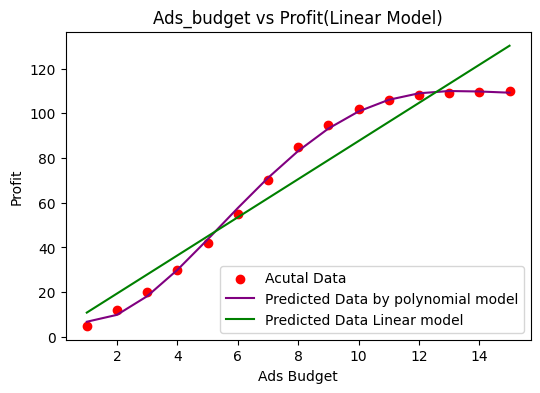

In [25]:
plt.figure(figsize=(6,4))
# plt.subplot(1,2,1)
plt.scatter(X,y,color='r',label='Acutal Data')
plt.plot(X,ln_poly.predict(X_poly),color='purple',label='Predicted Data by polynomial model')
plt.plot(X,ln.predict(X),color='Green',label='Predicted Data Linear model')
plt.title('Ads_budget vs Profit(Linear Model)')
plt.ylabel("Profit")
plt.xlabel("Ads Budget")
plt.legend()
plt.show()